In [600]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols, lambdify, pprint, Matrix, simplify
from sympy.solvers.ode.systems import dsolve_system
import scipy as sp
import time
import random

In [601]:
import matplotlib
matplotlib.rcParams.update({'font.size': 18})

In [602]:
from sympy.solvers import solve
from sympy import Symbol
h = Symbol('h')
r = Symbol('r')
sol_pc_h = solve(r**3-(3/2+(5*h)/24+(41*h**2)/24) * r**2 - (-1/2+(5*h)/6-(40*h**2)/24)*r-((11*h**2)/24-13*h/24), h)

In [603]:
sol_pc_h

[0.5*(-5.0*r**2 - 20.0*r - 98.5849887153212*sqrt(0.404979936207429*r**5 - r**4 + 0.924374935692973*r**3 - 0.332750282950921*r**2 + 0.000823129951641115*r + 0.0173886202284186) + 13.0)/(41.0*r**2 - 40.0*r + 11.0),
 0.5*(-5.0*r**2 - 20.0*r + 98.5849887153212*sqrt(0.404979936207429*r**5 - r**4 + 0.924374935692973*r**3 - 0.332750282950921*r**2 + 0.000823129951641115*r + 0.0173886202284186) + 13.0)/(41.0*r**2 - 40.0*r + 11.0)]

In [604]:
sol_pc_h[1]

0.5*(-5.0*r**2 - 20.0*r + 98.5849887153212*sqrt(0.404979936207429*r**5 - r**4 + 0.924374935692973*r**3 - 0.332750282950921*r**2 + 0.000823129951641115*r + 0.0173886202284186) + 13.0)/(41.0*r**2 - 40.0*r + 11.0)

In [605]:
pc_h1 = lambdify(r, sol_pc_h[0],'numpy')
pc_h2 = lambdify(r, sol_pc_h[1],'numpy')

In [606]:
e = np.exp(np.linspace(0,2*np.pi,10000)*1j)

In [607]:
pc_h1_e = pc_h1(e)
pc_h2_e = pc_h2(e)

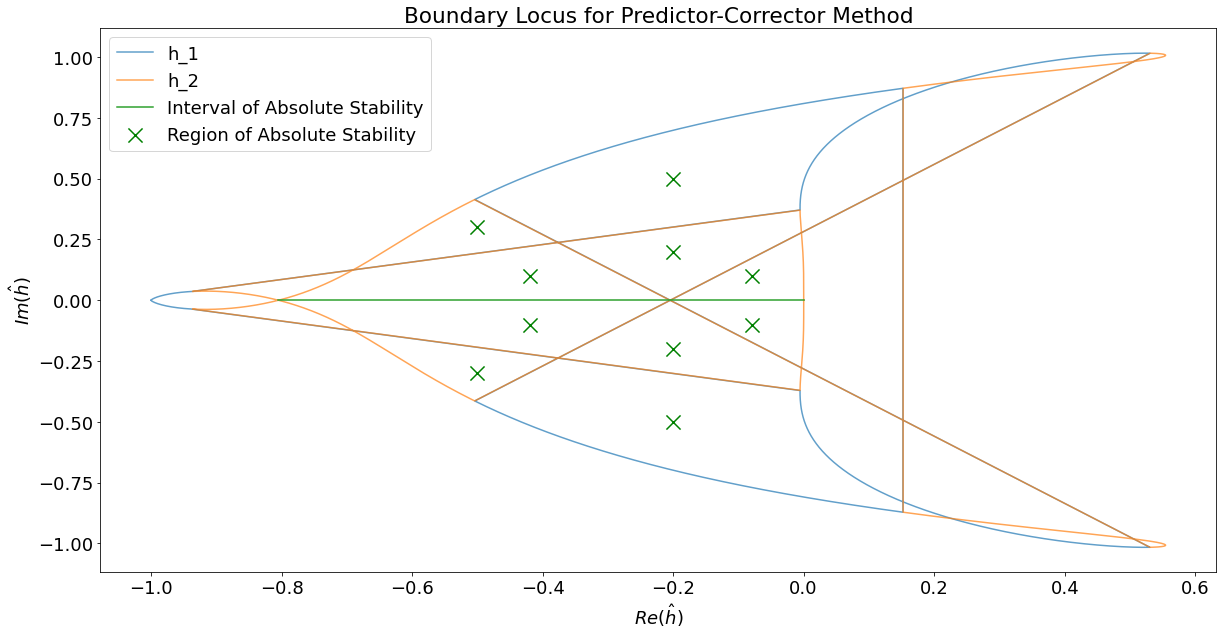

In [653]:
plt.figure(figsize=(20,10))
plt.plot(pc_h1_e.real,pc_h1_e.imag,label='h_1',alpha=0.7)
plt.plot(pc_h2_e.real,pc_h2_e.imag,label='h_2',alpha=0.7)
plt.xlabel("$Re(\hat{h})$")
plt.ylabel("$Im(\hat{h})$")
plt.title("Boundary Locus for Predictor-Corrector Method")
plt.plot([-.8048,-0],[0,0],label='Interval of Absolute Stability')

#plt.xlim(-.805,-.80475)
#plt.ylim(-.0001,.0001)
plt.scatter([-.08,-.08,-.2,-.2,-.2,-.2,-.42,-.42,-.5,-.5],[-.1,.1,.5,-.5,.2,-.2,-.1,.1,.3,-.3],marker='x',s=200, c='green',label="Region of Absolute Stability")
plt.legend()
plt.savefig('/Users/nikolaikrokhin/Downloads/NSODE_Coursework_3_plot1.png')
plt.show()

In [654]:
#vals to try -2, -0.9, -0.5, -0.1, 0.1, 1

In [655]:
h = Symbol('h')
r = Symbol('r')
sol_pc_r = solve(r**3-(3/2+5*h/24+41*h**2/24) * r**2 - (-1/2+5*h/6-40*h**2/24)*r-(11*h**2/24-13*h/24), r)

In [812]:
sol_pc_r

[0.569444444444444*h**2 + 0.0694444444444444*h - 0.149071198499986*(-5.0*h**2 + 2.5*h + 2.91840277777778*(-h**2 - 0.121951219512195*h - 0.878048780487805)**2 - 1.5)/(-0.553426824431198*h**2 + 0.654049883418688*h + (-(-h**2 + 0.5*h + 0.583680555555556*(-h**2 - 0.121951219512195*h - 0.878048780487805)**2 - 0.3)**3 + 0.42778125*(-0.846153846153846*h**2 + h - 0.0683760683760684*(-15.375*h**2 - 1.875*h - 13.5)*(1.66666666666667*h**2 - 0.833333333333333*h + 0.5) + 0.681792101930991*(-h**2 - 0.121951219512195*h - 0.878048780487805)**3)**2)**0.5 - 0.0447213595499958*(-15.375*h**2 - 1.875*h - 13.5)*(1.66666666666667*h**2 - 0.833333333333333*h + 0.5) + 0.445926044783747*(-h**2 - 0.121951219512195*h - 0.878048780487805)**3)**(1/3) - 0.74535599249993*(-0.553426824431198*h**2 + 0.654049883418688*h + (-(-h**2 + 0.5*h + 0.583680555555556*(-h**2 - 0.121951219512195*h - 0.878048780487805)**2 - 0.3)**3 + 0.42778125*(-0.846153846153846*h**2 + h - 0.0683760683760684*(-15.375*h**2 - 1.875*h - 13.5)*(1.6666

In [656]:
sol_pc_r_1, sol_pc_r_2, sol_pc_r_3 = lambdify(h,sol_pc_r[0],'numpy'), lambdify(h,sol_pc_r[1],'numpy'), lambdify(h,sol_pc_r[2],'numpy')

In [657]:
for h in [-2, -0.9, -0.5, -0.1, 0.1]:
    print("h: ",h, "r_1: ",np.absolute(sol_pc_r_1(h)), "r_2: ",np.absolute(sol_pc_r_2(h)), "r_3: ",np.absolute(sol_pc_r_3(h)))

h:  -2 r_1:  nan r_2:  nan r_3:  nan
h:  -0.9 r_1:  0.7648515275796646 r_2:  1.0596069686465226 r_3:  1.0596069686465226
h:  -0.5 r_1:  0.7091094570757253 r_2:  0.7372395185102811 r_3:  0.7372395185102811
h:  -0.1 r_1:  nan r_2:  nan r_3:  nan
h:  0.1 r_1:  nan r_2:  nan r_3:  nan


<string>:2: RuntimeWarning: invalid value encountered in double_scalars
<string>:2: RuntimeWarning: invalid value encountered in double_scalars
<string>:2: RuntimeWarning: invalid value encountered in double_scalars
<string>:2: RuntimeWarning: invalid value encountered in sqrt
<string>:2: RuntimeWarning: invalid value encountered in sqrt
<string>:2: RuntimeWarning: invalid value encountered in sqrt


In [749]:
#predictor
h = Symbol('h')
r = Symbol('r')
sol_p_h = solve(r**3-3*r**2/2+r/2 - (h/24)*(41*r**2-40*r+11) , h)

In [816]:
sol_p_h

[12*r*(2*r**2 - 3*r + 1)/(41*r**2 - 40*r + 11)]

In [750]:
p_h = lambdify(r, sol_p_h[0],'numpy')

In [751]:
p_h_e = p_h(e)

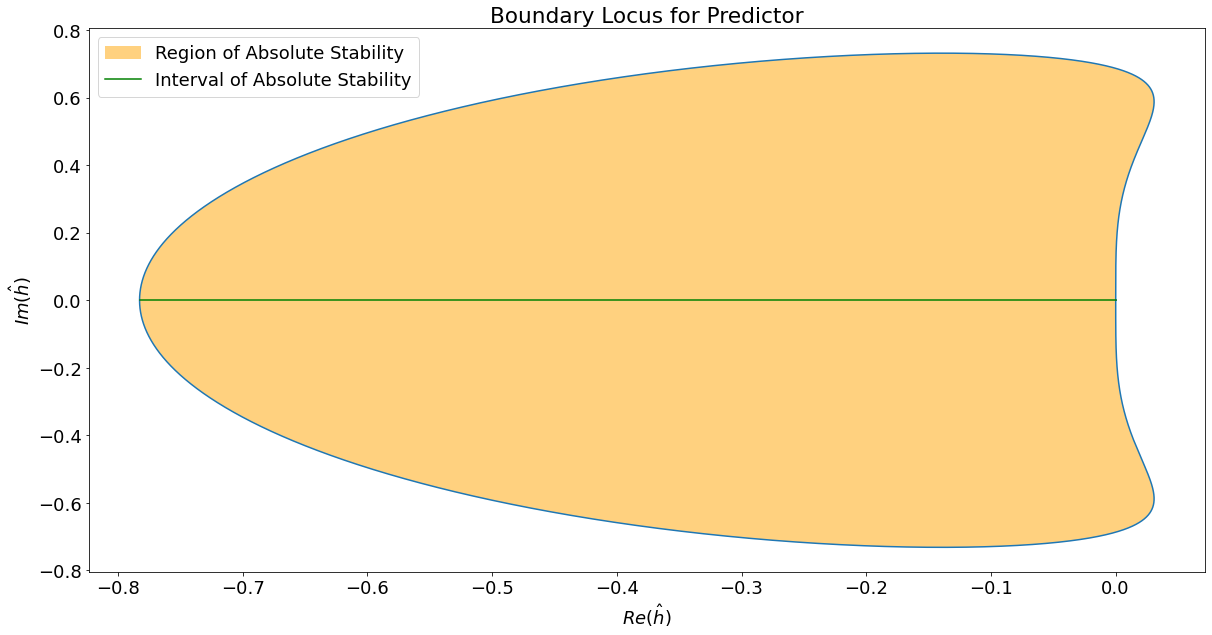

In [752]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(p_h_e.real,p_h_e.imag)
ax.set_xlabel("$Re(\hat{h})$")
ax.set_ylabel("$Im(\hat{h})$")
ax.set_title("Boundary Locus for Predictor")
ax.fill_between(p_h_e.real, p_h_e.imag, facecolor='orange', interpolate=True,alpha=0.5,label="Region of Absolute Stability")
plt.plot([-.782,0],[0,0],label='Interval of Absolute Stability',c='g')
plt.legend()
plt.savefig('/Users/nikolaikrokhin/Downloads/NSODE_Coursework_3_plot2.png')
plt.show()

In [753]:
h = Symbol('h')
r = Symbol('r')
sol_p_r = solve(r**3-3*r**2/2+r/2 - (h/24)*(41*r**2-40*r+11) , r)

In [754]:
sol_p_r_1, sol_p_r_2, sol_p_r_3 = lambdify(h,sol_p_r[0],'numpy'), lambdify(h,sol_p_r[1],'numpy'), lambdify(h,sol_p_r[2],'numpy')

In [755]:
for h in [-1,-0.5]:
    print("h: ",h, "r_1: ",np.absolute(sol_p_r_1(h)), "r_2: ",np.absolute(sol_p_r_2(h)), "r_3: ",np.absolute(sol_p_r_3(h)))

h:  -1 r_1:  1.3371640633950812 r_2:  0.5854615437652044 r_3:  0.5854615437652044
h:  -0.5 r_1:  0.587025492523463 r_2:  0.6248089517021589 r_3:  0.6248089517021589


In [756]:
h = Symbol('h')
r = Symbol('r')
sol_c_h = solve(r**3-3*r**2/2+r/2 - (h/24)*(24*r**3-31*r**2+32*r-13) , h)

In [817]:
sol_c_h

[12*r*(2*r**2 - 3*r + 1)/(24*r**3 - 31*r**2 + 32*r - 13)]

In [757]:
c_h = lambdify(r, sol_c_h[0],'numpy')

In [758]:
c_h_e = c_h(e)

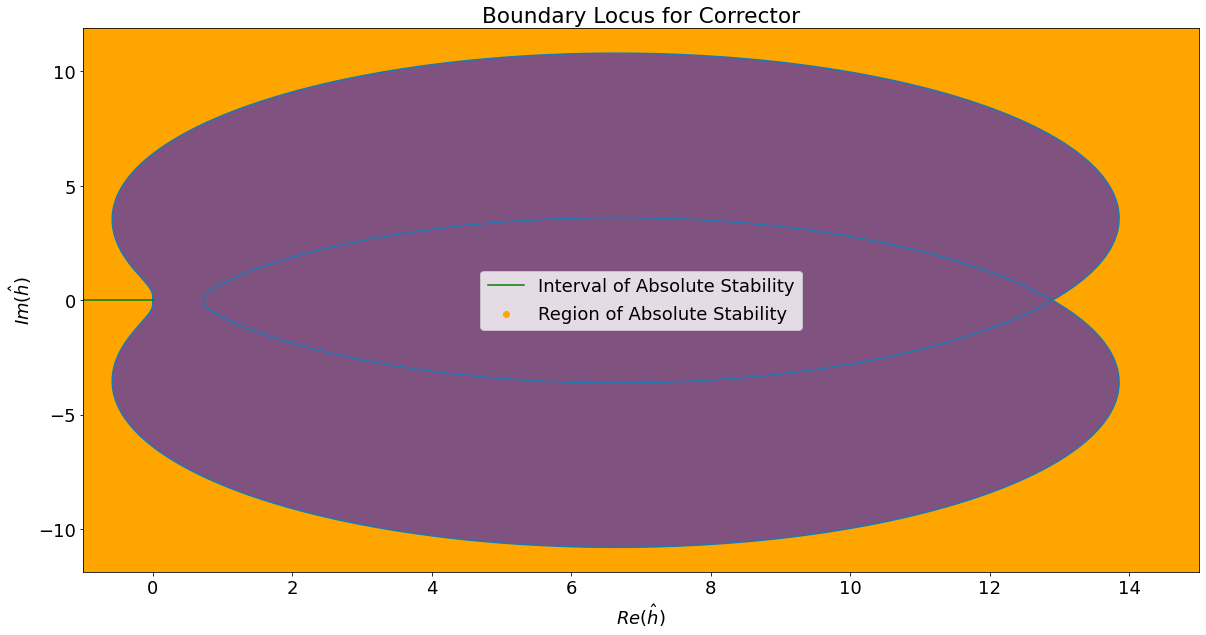

In [759]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(c_h_e.real,c_h_e.imag)
ax.set_xlabel("$Re(\hat{h})$")
ax.set_ylabel("$Im(\hat{h})$")
ax.set_title("Boundary Locus for Corrector")
ax.set_facecolor("orange")
ax.fill_between(c_h_e.real, c_h_e.imag, facecolor='blue', interpolate=True,alpha=0.5)
plt.plot([-4,-0],[0,0],label="Interval of Absolute Stability",c="g")
plt.scatter(0,10,c='orange',label="Region of Absolute Stability")
plt.xlim(-1,15)
plt.legend()
plt.savefig('/Users/nikolaikrokhin/Downloads/NSODE_Coursework_3_plot3.png')
plt.show()

In [760]:
h = Symbol('h')
r = Symbol('r')
sol_c_r = solve(r**3-3*r**2/2+r/2 - (h/24)*(24*r**3-31*r**2+32*r-13) , r)

In [761]:
sol_c_r_1, sol_c_r_2, sol_c_r_3 = lambdify(h,sol_c_r[0],'numpy'), lambdify(h,sol_c_r[1],'numpy'), lambdify(h,sol_c_r[2],'numpy')

In [762]:
for h in [-1,0.5,8,15]:
    print("h: ",h, "r_1: ",np.absolute(sol_c_r_1(h)), "r_2: ",np.absolute(sol_c_r_2(h)), "r_3: ",np.absolute(sol_c_r_3(h)))

h:  -1 r_1:  0.6221478187967273 r_2:  0.6597877775187211 r_3:  0.6597877775187211
h:  0.5 r_1:  nan r_2:  nan r_3:  nan
h:  8 r_1:  0.5860551715294205 r_2:  1.0277625235264432 r_3:  1.0277625235264432
h:  15 r_1:  0.587462119550215 r_2:  0.9939344258238835 r_3:  0.9939344258238835


<string>:2: RuntimeWarning: invalid value encountered in sqrt
<string>:2: RuntimeWarning: invalid value encountered in sqrt
<string>:2: RuntimeWarning: invalid value encountered in sqrt


In [763]:
#ex2

In [764]:
f = lambda x: np.array([-0.04*x[0]+1.0e4*x[1]*x[2],0.04*x[0]-1.0e4*x[1]*x[2]-3.0e7*x[1]**2,3.0e7*x[1]**2])

In [765]:
h = 1e-4
t = np.arange(0,100+h,h)

In [766]:
#Euler to find X_1, X_2
X_0 = np.array([1,0,0])
X = np.array([X_0])
X_1 = X_0 + h * f(X[0])
X = np.vstack((X[0],X_1))
X_2 = X[1] + h * f(X[1])
X = np.vstack((X,X_2))
Euler_X = X
print(X)

[[1.000000e+00 0.000000e+00 0.000000e+00]
 [9.999960e-01 4.000000e-06 0.000000e+00]
 [9.999920e-01 7.951984e-06 4.800000e-08]]


In [767]:
X = np.empty((len(t),3))
X[:3,:] = Euler_X
h_ = h / 24
for i in range(3,len(X)):
    p = f(1.5*X[i-1] -0.5*X[i-2] + h_*(41*f(X[i-1])-40*f(X[i-2])+11*f(X[i-3])))
    X[i] = 1.5*X[i-1] - 0.5*X[i-2] + h_*(24*p - 31*f(X[i-1])+32*f(X[i-2])-13*f(X[i-3]))
    

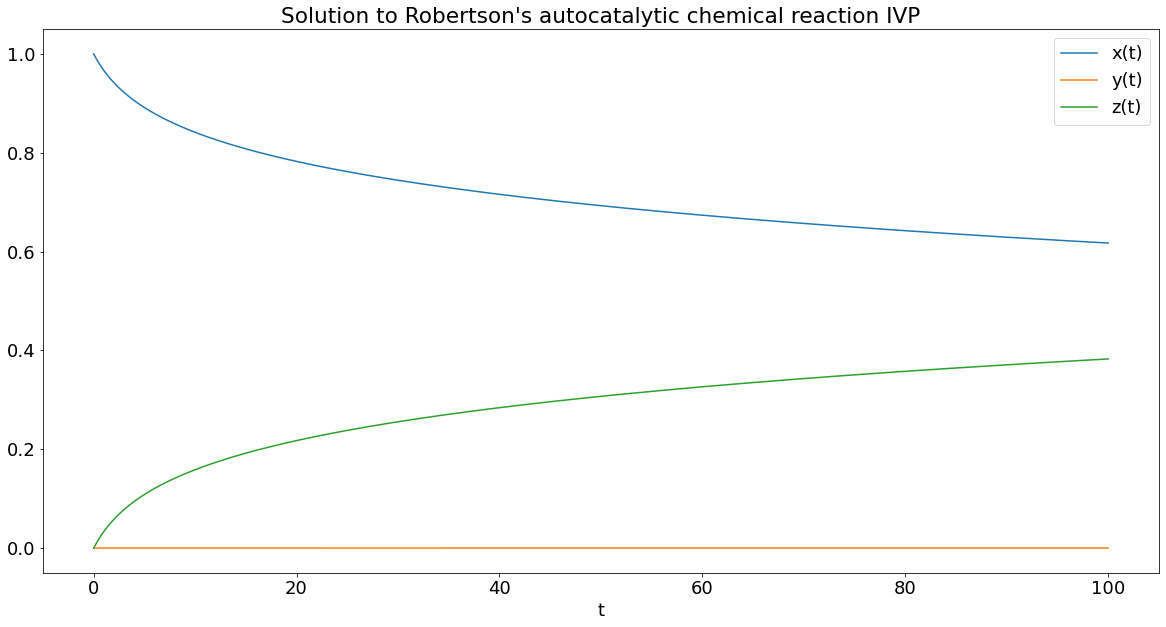

In [768]:
plt.figure(figsize=(20,10))
plt.plot(t,X[:,0],label="x(t)")
plt.plot(t,X[:,1],label="y(t)")
plt.plot(t,X[:,2],label="z(t)")
plt.legend()
plt.title("Solution to Robertson's autocatalytic chemical reaction IVP")
plt.xlabel("t")
plt.savefig('/Users/nikolaikrokhin/Downloads/NSODE_Coursework_3_plot4.png')
plt.show()

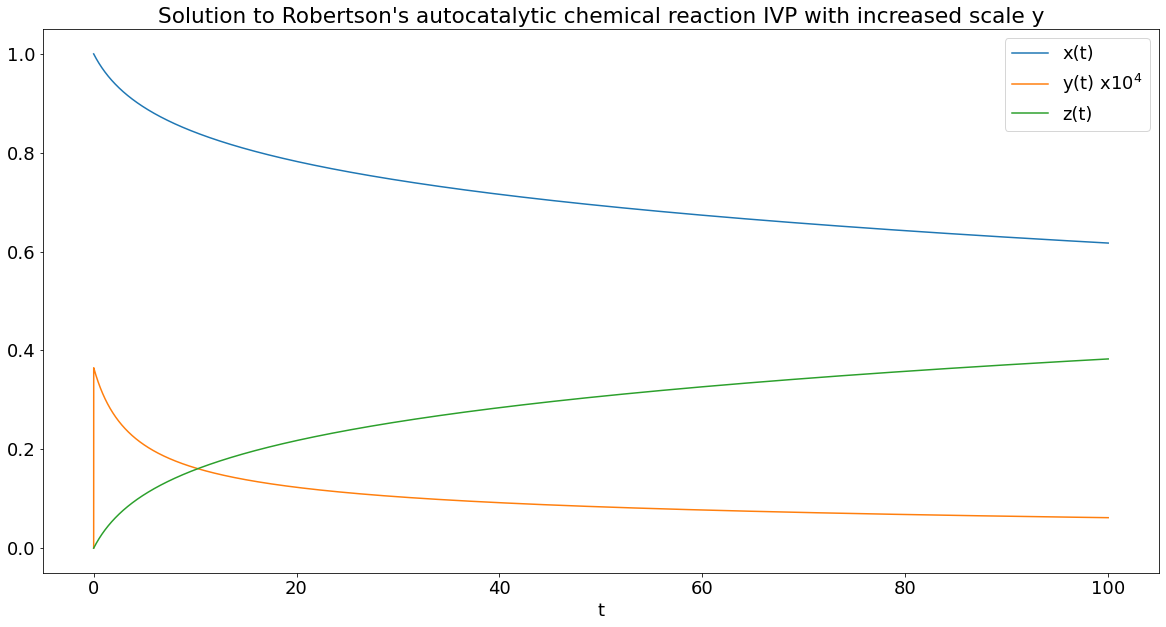

In [769]:
plt.figure(figsize=(20,10))
plt.plot(t,X[:,0],label="x(t)")
plt.plot(t,X[:,1]*10**4,label="y(t) x$ 10^4$")
plt.plot(t,X[:,2],label="z(t)")
plt.legend()
plt.title("Solution to Robertson's autocatalytic chemical reaction IVP with increased scale y")
plt.xlabel("t")
plt.savefig('/Users/nikolaikrokhin/Downloads/NSODE_Coursework_3_plot5.png')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


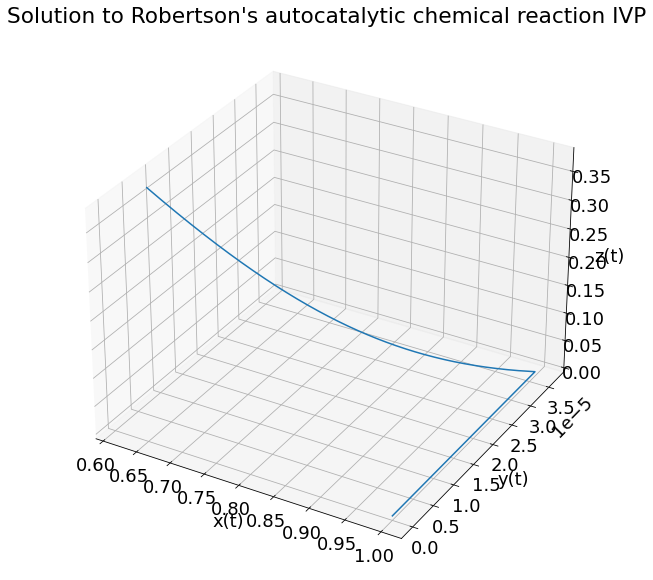

In [770]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot(X[:,0], X[:,1], X[:,2])
ax.set_xlabel("x(t)")
ax.set_ylabel("y(t)")
ax.set_zlabel("z(t)")
ax.set_title("Solution to Robertson's autocatalytic chemical reaction IVP")
plt.savefig('/Users/nikolaikrokhin/Downloads/NSODE_Coursework_3_plot6.png')
plt.show()

In [771]:
#ex3

In [772]:
f = lambda x: np.array([x[1]*(x[2]-1+x[0]**2)+0.87*x[0],x[0]*(3*x[2]+1-x[0]**2)+0.87*x[1],-2*x[2]*(1.1+x[0]*x[1])])

In [773]:
h = 1e-4
t = np.arange(0,50+h,h)

In [774]:
#Euler to find X_1, X_2
X_0 = np.array([-1,0,0.5])
X = np.array([X_0])
X_1 = X_0 + h * f(X[0])
X = np.vstack((X[0],X_1))
X_2 = X[1] + h * f(X[1])
X = np.vstack((X,X_2))
Euler_X = X
print(X)

[[-1.00000000e+00  0.00000000e+00  5.00000000e-01]
 [-1.00008700e+00 -1.50000000e-04  4.99890000e-01]
 [-1.00017402e+00 -2.99975695e-04  4.99780009e-01]]


In [775]:
start = time.time()
#implicit with fixed point
#initialise X with Euler found X_1, X_2
X = np.zeros((len(t),3))
X[:3,:] = Euler_X
h_ = h / 24
c = 0
for i in range(3,len(X)):
    #initialise fixed point for current X_i
    x_prev = X[i-1,:]
    #remove constant part of formula from each iteration for efficiency
    g = 1.5 * X[i-1,:] - 0.5 * X[i-2,:] + h_ * (-31 * f(X[i-1]) + 32 * f(X[i-2]) - 13 * f(X[i-3]))
    #set max iters to 1000000
    for n in range(1000000):
        c+=1
        #update each iteration
        x_new =  h * f(x_prev) + g
        if (np.linalg.norm(x_new-x_prev, ord=2) / np.linalg.norm(x_new,ord=2)) < 1.0e-4:
            break
        x_prev = x_new
    X[i,:] = x_new
end = time.time()
print(end-start)
print(c)

32.491426944732666
731014


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  


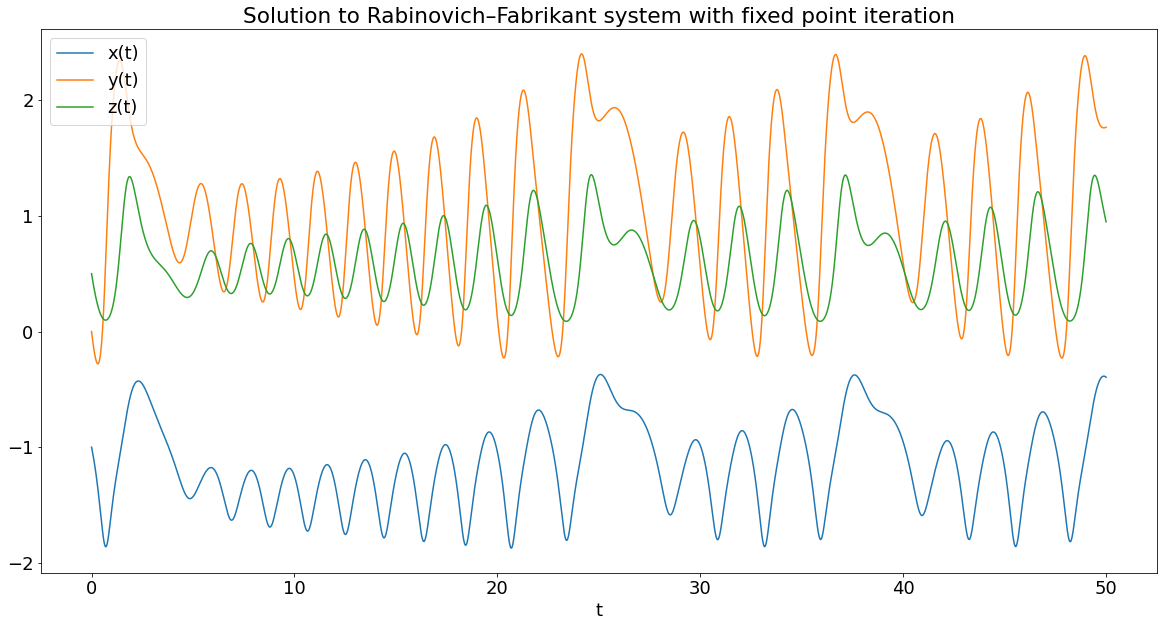

In [776]:
plt.figure(figsize=(20,10))
plt.plot(t,X[:,0],label="x(t)")
plt.plot(t,X[:,1],label="y(t)")
plt.plot(t,X[:,2],label="z(t)")
plt.legend()
plt.title("Solution to Rabinovich–Fabrikant system with fixed point iteration")
plt.xlabel("t")
plt.savefig('/Users/nikolaikrokhin/Downloads/NSODE_Coursework_3_plot7.png')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


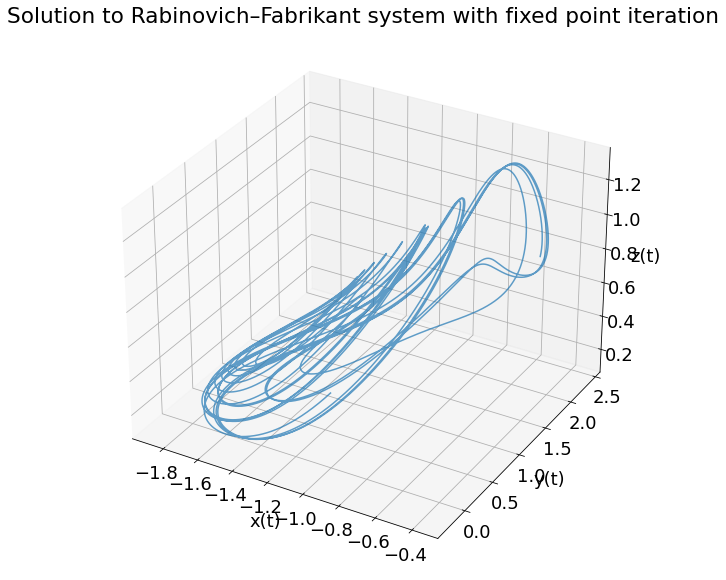

In [777]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot(X[:,0], X[:,1], X[:,2],alpha=0.7)
ax.set_xlabel("x(t)")
ax.set_ylabel("y(t)")
ax.set_zlabel("z(t)")
plt.title("Solution to Rabinovich–Fabrikant system with fixed point iteration")
plt.savefig('/Users/nikolaikrokhin/Downloads/NSODE_Coursework_3_plot8.png')
plt.show()

In [778]:
F = lambda X: X - h*np.array([X[1]*(X[2]-1+X[0]**2)+ 0.87*X[0],X[0]*(3*X[2]+1-X[0]**2)+0.87*X[1],-2*X[2]*(1.1+X[0]*X[1])])

In [779]:
F_prime = lambda X: np.array([[1-2*h*X[1]*X[0]-h*0.87,-h*(X[2]-1+X[0]**2),-h*X[1]],[-h*(3*X[2]+1-3*X[0]**2),1-h*0.87,-3*h*X[0]],[2*h*X[1]*X[2],2*h*X[0]*X[2],1+2*h*(1.1+X[0]*X[1])]])

In [780]:
h = 1e-4
t = np.arange(0,50+h,h)
start = time.time()
#implicit with fixed point
#initialise X with Euler found X_1, X_2
X = np.zeros((len(t),3))
X[:3,:] = Euler_X
h_ = h / 24
c = 0
for i in range(3,len(X)):
    #initialise fixed point for current X_i
    x_prev = X[i-1,:]
    #remove constant part of formula from each iteration for efficiency
    g_const = 1.5 * X[i-1,:] - 0.5 * X[i-2,:] + h_ * (-31 * f(X[i-1]) + 32 * f(X[i-2]) - 13 * f(X[i-3]))
    #set max iters to 1000000
    for n in range(10000):
        c+=1
        #update each iteration
        x_new = x_prev - np.linalg.solve(F_prime(x_prev), (F(x_prev)-g_const))
        if (np.linalg.norm(x_new-x_prev, ord=2) / np.linalg.norm(x_new,ord=2)) < 1.0e-4:
            break
        x_prev = x_new
    X[i,:] = x_new
    if np.linalg.norm(x_new) > 1000:
        break
end = time.time()
print(end-start)
print(c)

78.63206505775452
724069


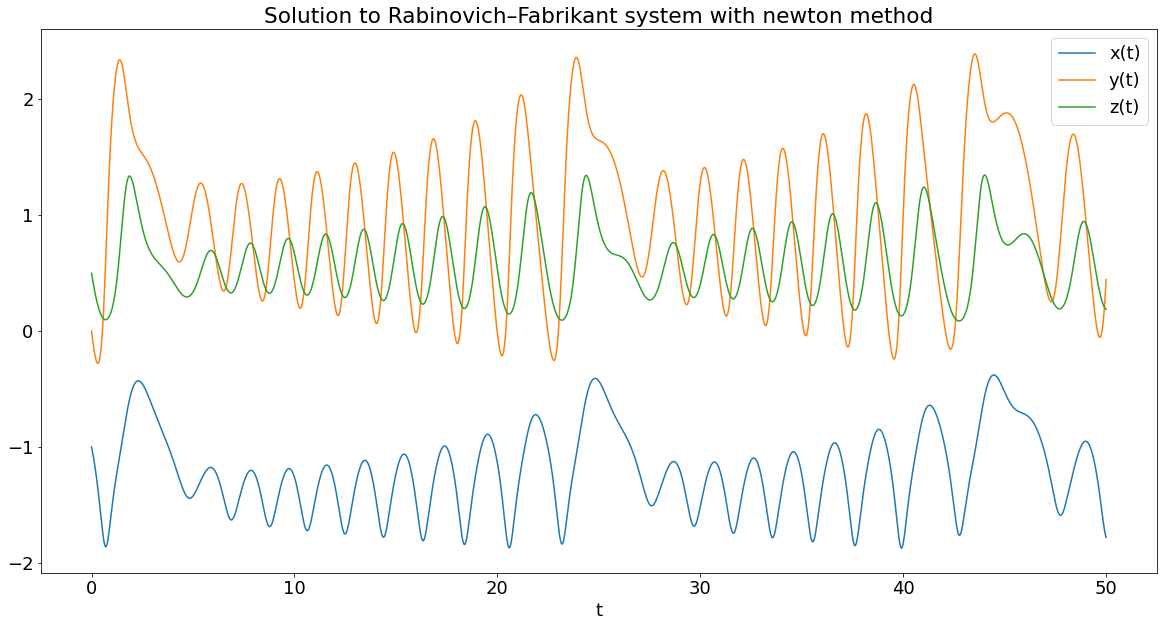

In [781]:
plt.figure(figsize=(20,10))
plt.plot(t,X[:,0],label="x(t)")
plt.plot(t,X[:,1],label="y(t)")
plt.plot(t,X[:,2],label="z(t)")
plt.legend()
plt.title("Solution to Rabinovich–Fabrikant system with newton method")
plt.savefig('/Users/nikolaikrokhin/Downloads/NSODE_Coursework_3_plot9.png')
plt.xlabel("t")
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


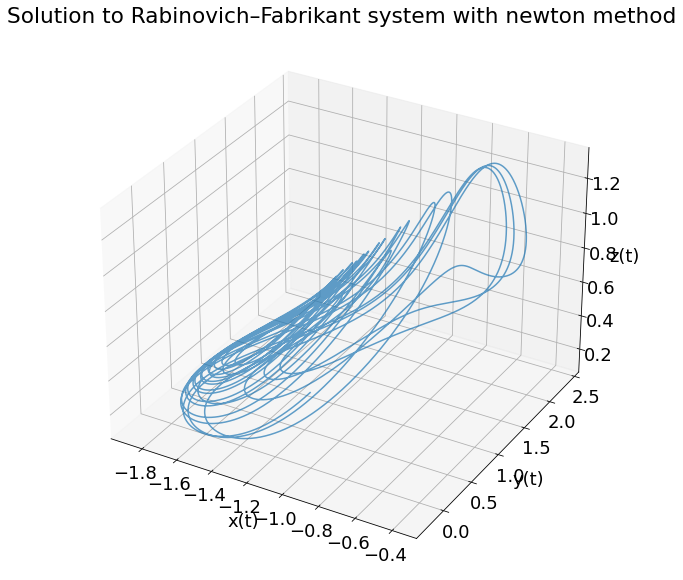

In [782]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot(X[:,0], X[:,1], X[:,2],alpha=0.7)
ax.set_xlabel("x(t)")
ax.set_ylabel("y(t)")
ax.set_zlabel("z(t)")
plt.title("Solution to Rabinovich–Fabrikant system with newton method")
plt.savefig('/Users/nikolaikrokhin/Downloads/NSODE_Coursework_3_plot10.png')
plt.show()

In [739]:
#ex4
r = Symbol('r')
h = Symbol('h')
a = Symbol('a')
sol1 = solve(r**3+a*r**2-(1+a),r)

In [818]:
sol1

[1, -a/2 - sqrt(a**2 - 2*a - 3)/2 - 1/2, -a/2 + sqrt(a**2 - 2*a - 3)/2 - 1/2]

In [740]:
sol1[2]

-a/2 + sqrt(a**2 - 2*a - 3)/2 - 1/2

In [741]:
solve(np.abs(sol1[1])<1)

(a <= -1) & (-oo < a)

In [742]:
solve(np.abs(sol1[2])<1)

(a <= -1) & (-3/2 < a)

In [743]:
r = Symbol('r')
h = Symbol('h')
a = Symbol('a')
sol2 = solve(r**3+a*r**2-(1+a)-h*(3+2*a),h)

In [744]:
fun = lambdify((a,r),sol2[0],'numpy')

In [745]:
fun(-1,e)

array([ 0.00000000e+00+0.00000000e+00j, -9.87157440e-07+6.28380583e-04j,
       -3.94862469e-06+1.25675645e-03j, ...,
       -3.94862469e-06-1.25675645e-03j, -9.87157440e-07-6.28380583e-04j,
        0.00000000e+00-2.44929360e-16j])

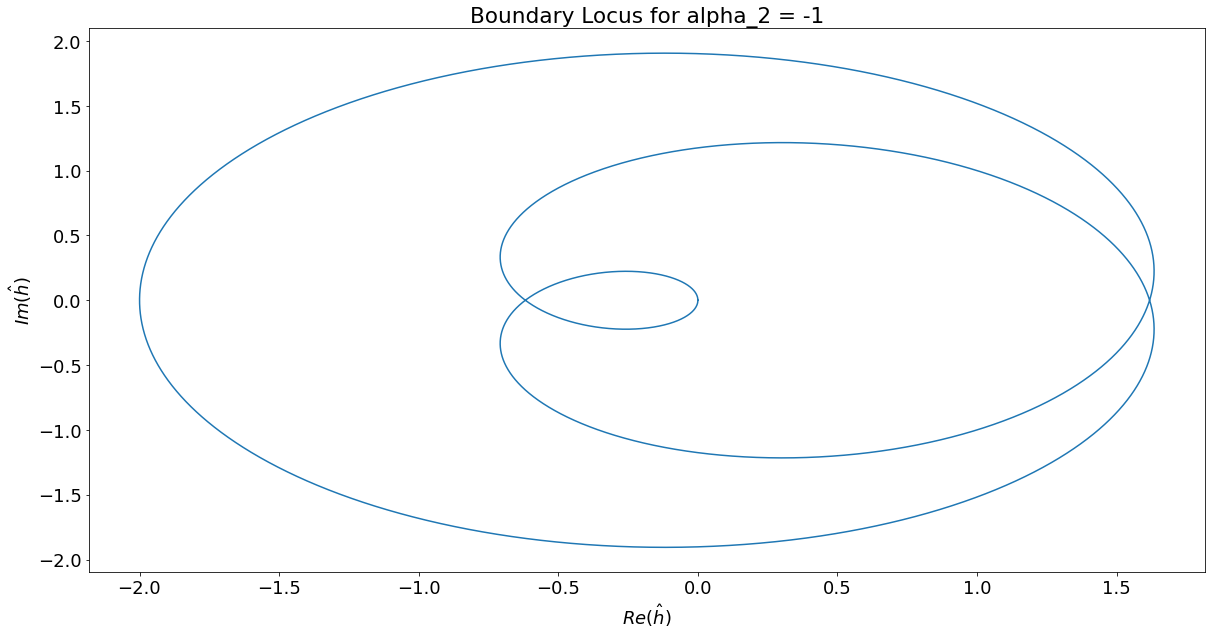

In [804]:
plt.figure(figsize=(20,10))
h = 0.01
a = -1
plt.plot(fun(a,e).real,fun(a,e).imag)

plt.xlabel("$Re(\hat{h})$")
plt.ylabel("$Im(\hat{h})$")
plt.title("Boundary Locus for alpha_2 = -1")
plt.savefig('/Users/nikolaikrokhin/Downloads/NSODE_Coursework_3_plot11.png')
plt.show()

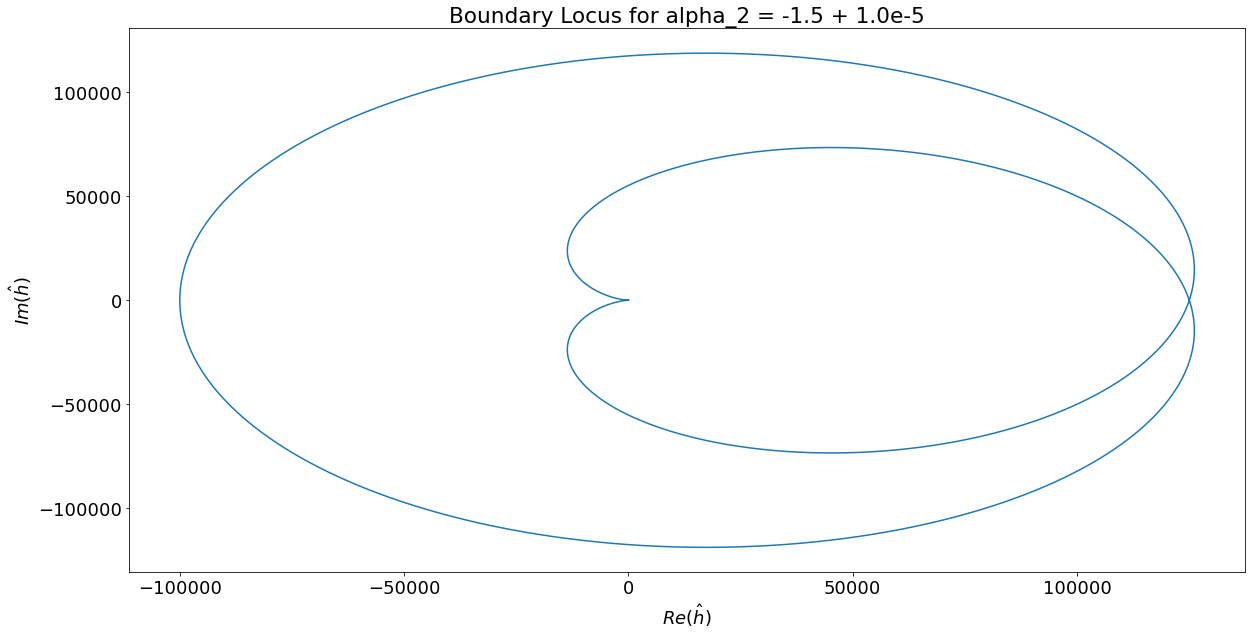

In [805]:
plt.figure(figsize=(20,10))
h = 0.01
a = -3/2+1.0e-5
plt.plot(fun(a,e).real,fun(a,e).imag)

plt.xlabel("$Re(\hat{h})$")
plt.ylabel("$Im(\hat{h})$")
plt.title("Boundary Locus for alpha_2 = -1.5 + 1.0e-5")
plt.savefig('/Users/nikolaikrokhin/Downloads/NSODE_Coursework_3_plot12.png')
plt.show()

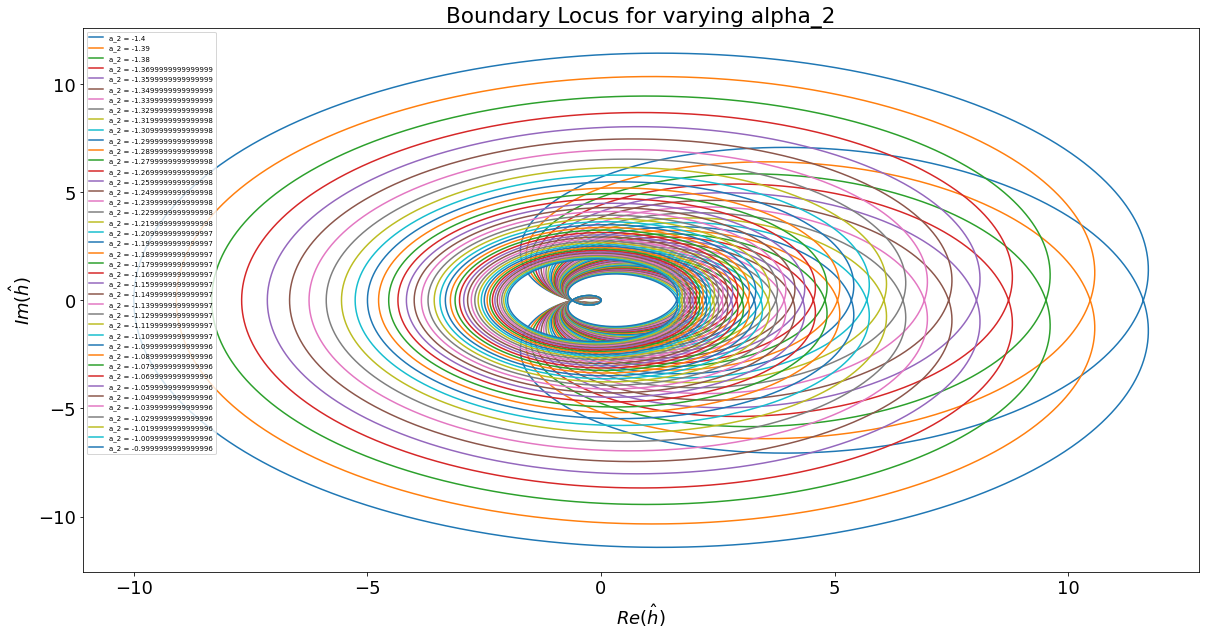

In [806]:
plt.figure(figsize=(20,10))
h = 0.01
for a in np.arange(-3/2+10*h,-1+h,h):
    plt.plot(fun(a,e).real,fun(a,e).imag, label=f'a_2 = {a}')

plt.xlabel("$Re(\hat{h})$")
plt.ylabel("$Im(\hat{h})$")
plt.title("Boundary Locus for varying alpha_2")
plt.legend(fontsize=7)
plt.savefig('/Users/nikolaikrokhin/Downloads/NSODE_Coursework_3_plot13.png')
plt.show()

In [807]:
r = Symbol('r')
h = Symbol('h')
a = Symbol('a')
sol2 = solve(r**3+a*r**2-(1+a)-h*(3+2*a),r)
print(sol2)
sol_c_r_1, sol_c_r_2, sol_c_r_3 = lambdify((a,h),sol2[0],'numpy'), lambdify((a,h),sol2[1],'numpy'), lambdify((a,h),sol2[2],'numpy')

[-a**2/(3*(a**3 - 27*a*h - 27*a/2 - 81*h/2 + sqrt(-4*a**6 + (2*a**3 - 54*a*h - 27*a - 81*h - 27)**2)/2 - 27/2)**(1/3)) - a/3 - (a**3 - 27*a*h - 27*a/2 - 81*h/2 + sqrt(-4*a**6 + (2*a**3 - 54*a*h - 27*a - 81*h - 27)**2)/2 - 27/2)**(1/3)/3, -a**2/(3*(-1/2 - sqrt(3)*I/2)*(a**3 - 27*a*h - 27*a/2 - 81*h/2 + sqrt(-4*a**6 + (2*a**3 - 54*a*h - 27*a - 81*h - 27)**2)/2 - 27/2)**(1/3)) - a/3 - (-1/2 - sqrt(3)*I/2)*(a**3 - 27*a*h - 27*a/2 - 81*h/2 + sqrt(-4*a**6 + (2*a**3 - 54*a*h - 27*a - 81*h - 27)**2)/2 - 27/2)**(1/3)/3, -a**2/(3*(-1/2 + sqrt(3)*I/2)*(a**3 - 27*a*h - 27*a/2 - 81*h/2 + sqrt(-4*a**6 + (2*a**3 - 54*a*h - 27*a - 81*h - 27)**2)/2 - 27/2)**(1/3)) - a/3 - (-1/2 + sqrt(3)*I/2)*(a**3 - 27*a*h - 27*a/2 - 81*h/2 + sqrt(-4*a**6 + (2*a**3 - 54*a*h - 27*a - 81*h - 27)**2)/2 - 27/2)**(1/3)/3]


In [808]:
a = -1.4999
for h in [-0.25]:
    print("h: ",h, "r_1: ",np.absolute(sol_c_r_1(a,h)), "r_2: ",np.absolute(sol_c_r_2(a,h)), "r_3: ",np.absolute(sol_c_r_3(a,h)))

h:  -0.25 r_1:  0.4999888882304101 r_2:  0.9999611101491265 r_3:  0.9999611101491265


In [809]:
r = Symbol('r')
h = Symbol('h')
sol2 = solve(r**3+r**2-h*5,r)

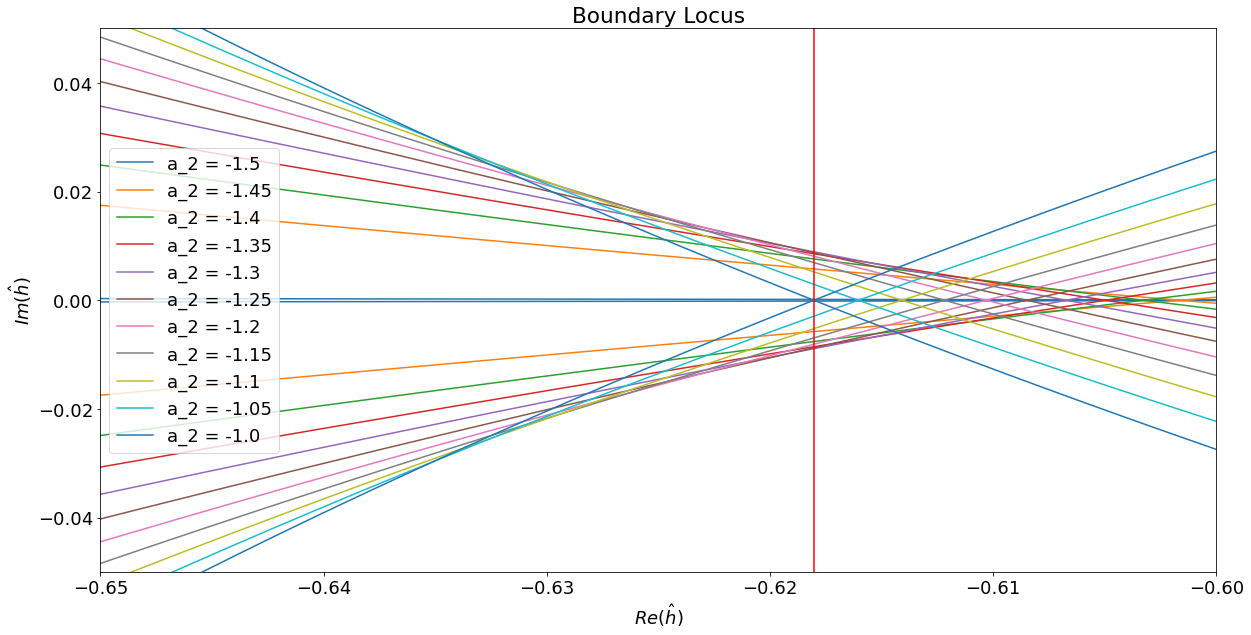

In [810]:
plt.figure(figsize=(20,10))
h = 0.05
for a in np.arange(-3/2+1.0e-5,-1+h,h):
    plt.plot(fun(a,e).real,fun(a,e).imag, label=f'a_2 = {np.round(a,2)}')
plt.xlabel("$Re(\hat{h})$")
plt.ylabel("$Im(\hat{h})$")
plt.title("Boundary Locus")
plt.xlim(-.65,-.6)
plt.ylim(-0.05,0.05)
plt.axvline(-.618034, c= 'r')
plt.legend()
plt.savefig('/Users/nikolaikrokhin/Downloads/NSODE_Coursework_3_plot14.png')
plt.show()

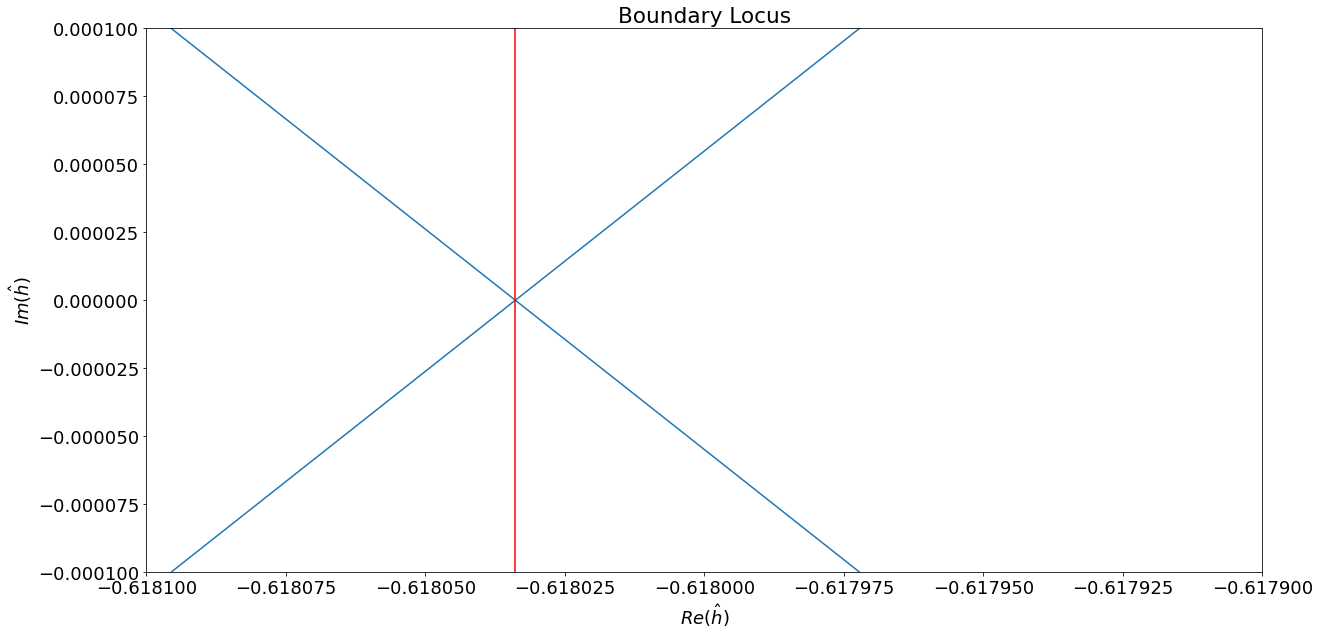

In [811]:
plt.figure(figsize=(20,10))
h = 0.01
a = -1
plt.plot(fun(a,e).real,fun(a,e).imag)

plt.xlabel("$Re(\hat{h})$")
plt.ylabel("$Im(\hat{h})$")
plt.title("Boundary Locus")
plt.xlim(-.6181,-.6179)
plt.ylim(-0.0001,0.0001)
plt.axvline(-.618034, c= 'r')
plt.savefig('/Users/nikolaikrokhin/Downloads/NSODE_Coursework_3_plot15.png')
plt.show()